In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
from skimage import morphology, io, color, exposure, img_as_float, transform
import cv2
from PIL import Image, ImageOps, ImageEnhance, ImageTransform
from matplotlib import pyplot as plt
import numpy as np
from utils import *
from models.densenet import DenseNet
import torchvision.transforms as transforms

In [5]:
net = DenseNet('densenet121')
transform = transforms.Lambda(lambda image: ImageOps.equalize(image))

In [16]:
transforms.RandomResizedCrop?

Init signature: transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
Docstring:     
Crop the given PIL Image to random size and aspect ratio.

A crop of random size (default: of 0.08 to 1.0) of the original size and a random
aspect ratio (default: of 3/4 to 4/3) of the original aspect ratio is made. This crop
is finally resized to given size.
This is popularly used to train the Inception networks.

Args:
    size: expected output size of each edge
    scale: range of size of the origin size cropped
    ratio: range of aspect ratio of the origin aspect ratio cropped
    interpolation: Default: PIL.Image.BILINEAR
File:           ~/miniconda2/envs/dat/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg/torchvision/transforms/transforms.py
Type:           type


Text(0.5,1,'High contrast')

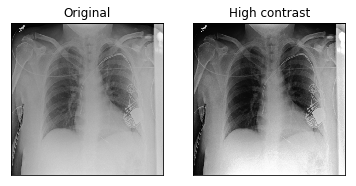

In [13]:
image_path = '/home/dattran/data/xray/00000108_001.png'
# image = io.imread(image_path)
image = Image.open(image_path).convert('RGB')
plt.subplot(121)
plt.imshow(np.array(image))
plt.xticks([])
plt.yticks([])
plt.title('Original')
plt.subplot(122)
image = transform(image)
plt.imshow(np.array(image))
plt.xticks([])
plt.yticks([])
plt.title('High contrast')

In [5]:
image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


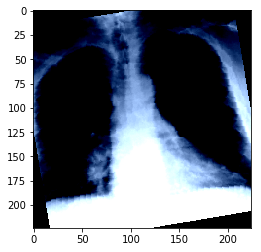

In [4]:
image = data.numpy()[3]
image = image.transpose((1, 2, 0))
image.shape
plt.imshow(image)